##### （1） 数据可视化和数据分布变换
##### （2） 缺省值处理
##### （3） 数据特征变换
##### （4） 数据建模及交叉检验
##### （5） 模型组合

In [381]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

# 加载数据

In [382]:
df_test = pd.read_csv('test.csv').copy()
df_train = pd.read_csv('train.csv').copy()

In [383]:
df_train.shape

(1460, 81)

In [384]:
df_test.shape

(1459, 80)

In [385]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [386]:
# df_train.columns.values
# df_train['MSZoning'].describe()

# 数据可视化和数据分布变换

In [387]:
#Saving Ids
ID_train = df_train['Id']
ID_test  = df_test['Id']

#Dropping Ids
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

In [388]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


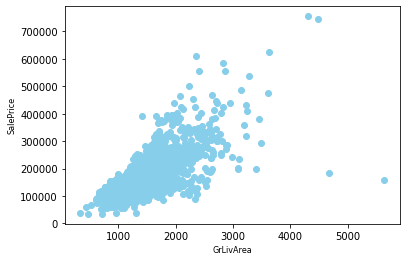

In [389]:
#房屋面积与Price的关系
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'], c = "skyblue")
plt.ylabel('SalePrice', fontsize=8)
plt.xlabel('GrLivArea', fontsize=8)
plt.show()

In [390]:
# 考虑删除特殊点（面积大于4000，价格小于200000）

# df_train.drop(df_train[(df_train['GrLivArea']>4000)&
#                     (df_train['GrLivArea']<30000)].index,inplace=True)

In [391]:
# 貌似nan不能画？

# def FeatureDFrameScatter(DFrame, x_feature, y_feature, subf_x_num, subf_y_num, figsize=(20,80)):
#     n = subf_x_num*subf_y_num
#     count = 0
#     f, subf = plt.subplots(subf_x_num,subf_y_num,figsize=figsize)

#     for i in range(subf_x_num):
#         for j in range(subf_y_num):
#                 if count < n:
#                     subf[i][j].scatter(x = DFrame[x_feature[count]], y = DFrame[y_feature[0]])
#                     subf[i][j].set_xlabel(x_feature[count])
#                 count+=1
#     if count < n:
#         subf.scatter([],[])
        
#     plt.show()

# FeatureDFrameScatter(df_train, df_train.columns.values[1:df_train.values.shape[1]-1],['SalePrice'],27,3)

### 数据分布

In [392]:
# 统计表述
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

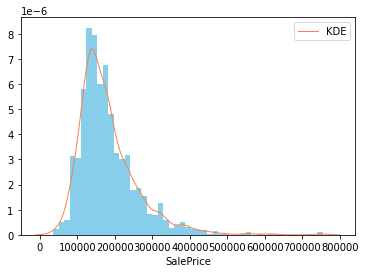

In [393]:
# 绘制分布图
sns.distplot(df_train['SalePrice'], 
             kde_kws={"color": "coral", "lw": 1, "label": "KDE"}, 
             hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "skyblue"});

In [394]:
# ....

# 缺失值处理

In [395]:
df_train_size = df_train.shape[0]
df_test_size  = df_test.shape[0]
target_variable = df_train['SalePrice'].values

# del df_train["SalePrice"]

data = pd.concat((df_train, df_test),sort=False).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)

In [396]:
data.shape

(2919, 79)

In [397]:
data.count().sort_values().head(34)

PoolQC            10
MiscFeature      105
Alley            198
Fence            571
FireplaceQu     1499
LotFrontage     2433
GarageCond      2760
GarageYrBlt     2760
GarageFinish    2760
GarageQual      2760
GarageType      2762
BsmtExposure    2837
BsmtCond        2837
BsmtQual        2838
BsmtFinType2    2839
BsmtFinType1    2840
MasVnrType      2895
MasVnrArea      2896
MSZoning        2915
BsmtFullBath    2917
Utilities       2917
Functional      2917
BsmtHalfBath    2917
TotalBsmtSF     2918
BsmtFinSF1      2918
KitchenQual     2918
Electrical      2918
Exterior2nd     2918
Exterior1st     2918
GarageCars      2918
GarageArea      2918
BsmtFinSF2      2918
SaleType        2918
BsmtUnfSF       2918
dtype: int64

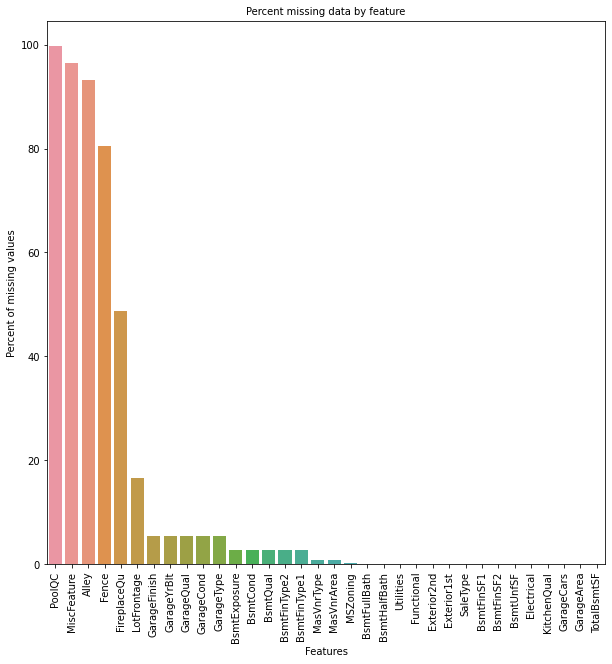

In [398]:
data_na = (data.isnull().sum() / len(data)) * 100
# data_na = data.isnull().sum()
data_na.drop(data_na[data_na==0].index,inplace=True)
data_na = data_na.sort_values(ascending=False)
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='90')   # 坐标轴的数字竖着写
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=10)
plt.title('Percent missing data by feature', fontsize=10)
plt.show()

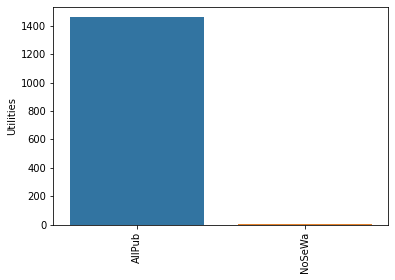

In [399]:
var = 'Utilities'
train_var_count = df_train[var].value_counts()   # value_counts 返回不同数值的数量
fig = sns.barplot(x=train_var_count.index, y=train_var_count)
plt.xticks(rotation=90);

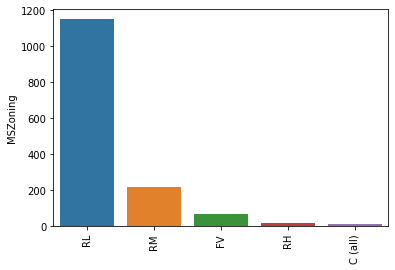

1460


In [400]:
var = 'MSZoning'
train_var_count = df_train[var].value_counts()
fig = sns.barplot(x=train_var_count.index, y=train_var_count)
plt.xticks(rotation=90);
plt.show()
print(df_train[var].count())

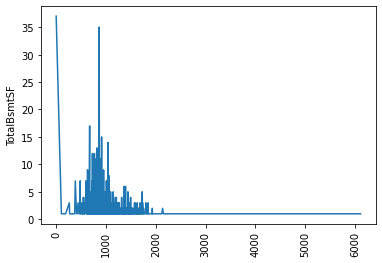

2918


In [401]:
var = 'TotalBsmtSF'
train_var_count = df_train[var].value_counts()
# fig = sns.barplot(x=train_var_count.index, y=train_var_count)
fig = sns.lineplot(x=train_var_count.index, y=train_var_count)
plt.xticks(rotation=90);
plt.show()
print(data[var].count())

In [402]:
# 填充nil
features_fill_na_none = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MasVnrType']

# 填充0
features_fill_na_0 = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea',
                      'BsmtFullBath','BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 
                      'BsmtUnfSF', 'TotalBsmtSF']

# 填众数
features_fill_na_mode = ["Functional", "MSZoning", "SaleType", "Electrical", 
                         "KitchenQual", "Exterior2nd", "Exterior1st"]
# str差几十个填众数，差100+填'none'？？

for feature_none in features_fill_na_none:
    data[feature_none].fillna('None',inplace=True)
    
for feature_0 in features_fill_na_0:
    data[feature_0].fillna(0,inplace=True)

for feature_mode in features_fill_na_mode:
    mode_value = data[feature_mode].value_counts().sort_values(ascending=False).index[0]
    data[features_fill_na_mode] = data[features_fill_na_mode].fillna(mode_value)

# 用中值代替
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))    # 这里的x是 LotFrontage每组数据  (根据Neighborhood组合的 )

# 像 Utilities 这种总共才两个值，同时有一个值是作为主要的，这种字段是无意义的，应该删除
data.drop(['Utilities'], axis=1,inplace=True)

In [403]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na.drop(data_na[data_na==0].index,inplace=True)
data_na = data_na.sort_values(ascending=False)
data_na # data_na 为空

Series([], dtype: float64)

In [404]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)     # apply 里面放函数
                                                                             # 这里是对每一行做str(line) 处理

#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)    # astype(数据类型)  强制转换

#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [405]:
# data['YrSold']

In [406]:
# data['YrSold']

# 绘制关系矩阵

In [407]:
# 关系矩阵
corrmat = df_train.corr()
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [408]:
mask = np.zeros_like(corrmat) # 返回相同大小的0矩阵
mask[np.triu_indices_from(mask)] = 1.   # triu_indices_from: 返回函数的上三角矩阵
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

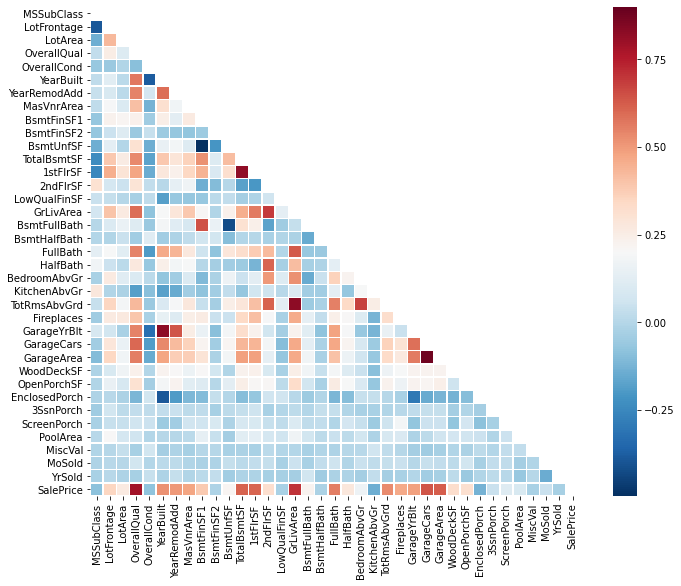

In [409]:
# 绘制热力图
# 设置vmin可使得0.00对应白色，但是这样看可以看出最突出的几个特征
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, mask=mask, linewidths=.5,vmax=0.9, square=True, cmap="RdBu_r")

# 特征工程

对于数值型的数据，尽量将其变为正态分布。

In [410]:
# 将str特征和数值特征分开，将数值型特征转换为float

encode_cat_variables = ('Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 
                        'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 
                        'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 
                        'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 
                        'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive', 
                        'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'YrSold')

# numerical_features = [col for col in data.columns if col not in encode_cat_variables]

for variable in data.columns:
    if variable not in encode_cat_variables:
        data[variable] = data[variable].apply(float)
    else:
        data[variable] = data[variable].apply(str)

print(data.shape)



# data = pd.get_dummies(data)
# print(data.shape)

(2919, 78)


In [411]:
# 修改离散str数据
from sklearn.preprocessing import LabelEncoder
'''好像float处理不了'''

for j in range(data.shape[1]):
    name = []
    if type(data.values[0, j]) == type(''):
        class_le = LabelEncoder()
        data[data.columns.values[j]] = class_le.fit_transform(data[data.columns.values[j]])

# 逆映射
# class_le.inverse_transform(df[''])

In [412]:
# 可以计算一个总面积指标
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

# 建模

In [413]:
train = data[:df_train_size]
test = data[df_train_size:]
X_train, y_train = train, target_variable

In [414]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

def PolynomialLogisticRegression(degree=1, n_components=0.9, C=0.1, penalty='l2', solver='liblinear'):
    return Pipeline([
            ("poly", PolynomialFeatures(degree=degree)),
#             ("std_scalert", StandardScaler()),
#             ("pca", PCA(n_components=n_components)),
            ("lin_reg", LinearRegression())
    ] )

In [415]:
lin_reg = PolynomialLogisticRegression()
lin_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [416]:
lin_reg.score(X_train, y_train)

0.8538999445625868

In [417]:
predict = lin_reg.predict(test)

In [421]:
csv = {'Id':ID_test.values, 'SalePrice':predict}
df =pd.DataFrame(csv)
df.to_csv('predcit5-4-2.csv',index=None)

In [419]:
####### get_dummies 和 普通的 LabelEncoder 对score有什么区别

In [420]:
data.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,10,3,65.0,8450.0,1,1,3,3,4,0,...,0.0,3,4,1,0.0,4,2,9,4,2566.0
1,5,3,80.0,9600.0,1,1,3,3,2,0,...,0.0,3,4,1,0.0,7,1,9,4,2524.0
2,10,3,68.0,11250.0,1,1,0,3,4,0,...,0.0,3,4,1,0.0,11,2,9,4,2706.0
3,11,3,60.0,9550.0,1,1,0,3,0,0,...,0.0,3,4,1,0.0,4,0,9,0,2473.0
4,10,3,84.0,14260.0,1,1,0,3,2,0,...,0.0,3,4,1,0.0,3,2,9,4,3343.0
5,9,3,85.0,14115.0,1,1,0,3,4,0,...,0.0,3,2,3,700.0,1,3,9,4,2158.0
6,5,3,75.0,10084.0,1,1,3,3,4,0,...,0.0,3,4,1,0.0,10,1,9,4,3380.0
7,10,3,80.0,10382.0,1,1,0,3,0,0,...,0.0,3,4,3,350.0,2,3,9,4,3197.0
8,9,4,51.0,6120.0,1,1,3,3,4,0,...,0.0,3,4,1,0.0,6,2,9,0,2726.0
9,4,3,50.0,7420.0,1,1,3,3,0,0,...,0.0,3,4,1,0.0,0,2,9,4,2068.0
